In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
# from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found (the tables)
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

## I would like to go on this trip the week after graduation so 5/12/2019 to 5/19/2019

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
# session.get_table_names()
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
## first I need to figure out what the newest date in the database is. To do this I need to see the fields for each table...

## for the Measurement table
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
## first I need to figure out what the newest date in the database is. To do this I need to see the fields for each table...

## for the Station table
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])
    


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
print("first 5 rows of the Measurement table")
engine.execute("SELECT * FROM measurement LIMIT 5").fetchall()

first 5 rows of the Measurement table


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [16]:
print("first 5 rows of the Station table")
engine.execute("SELECT * FROM station LIMIT 5").fetchall()

first 5 rows of the Station table


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [17]:
## OK, now I know that the date is only in the Measurement table, so we will use that to find the newest date
## I will set this to be "max_date"
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# max_date_substr = max_date.str.slice(3, 10)
print(f"The max date in the data is {max_date}")

The max date in the data is ('2017-08-23',)


In [18]:
p_year_from_max = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print (f"The max date in the data is {max_date}, and one year before that is {p_year_from_max}")

The max date in the data is ('2017-08-23',), and one year before that is 2016-08-23


In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

date = dt.datetime(2016, 8, 23)
sel = [Measurement.prcp, Measurement.date]
prcp_w_date = session.query(*sel).\
    filter(Measurement.date > date).all()

prcp_df = pd.DataFrame(prcp_w_date, columns=["Percipitation", "Date"])
prcp_df.set_index("Date", inplace=True)

# prcp_df



In [20]:
prcp_df_clean = prcp_df.loc[prcp_df["Percipitation"] > 0, ["Percipitation"]]
# prcp_df_clean

In [21]:
prcp_df_s = prcp_df_clean.sort_values("Date")
prcp_df_s.head()

,Percipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,1.22
2016-08-24,1.45
2016-08-24,2.15


In [22]:
# prcp_df_s.plot.bar()

# plt.axis('off')
# plt.suptitle("")
# plt.tight_layout()
# plt.show()

In [23]:
# fig = plt.figure()
# ax1 = prcp_df_s.index
# ay1 = prcp_df_s.Percipitation


# plt.setp(ax1.get_xticklabels(), visible=False)

# plt.show()

# prcp_df_s

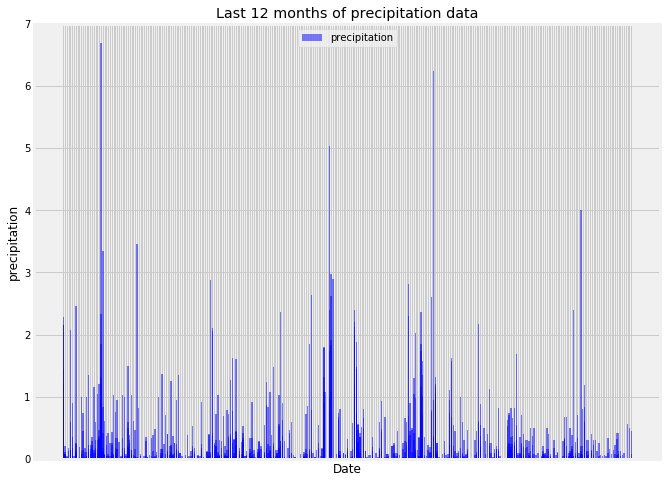

In [59]:
## I spent about 6 hours trying to get this correct.
## I really had a lot of trubble finding information about how to remove the dates from the bottom of the chart.
#### I need to go ahead and stop here on this graph as it is taking all of my time and there is sooooo much more to this homework.

x_axis = prcp_df_s.index
y_axis = prcp_df_s.Percipitation

plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

plt.tick_params(axis="x", labelbottom=False)

plt.ylim(0, 7)
plt.legend(["precipitation"], loc="upper center")
plt.title("Last 12 months of precipitation data")
plt.xlabel("Date")
plt.ylabel("precipitation")

plt.rcParams["figure.figsize"] = (10,8)

plt.show()

In [25]:
# Perform a query to retrieve the data and precipitation scores



![precipitation](Images/precipitation.png)

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data

date2 = dt.datetime(1601, 8, 23)
sel = [Measurement.prcp, Measurement.date]
prcp_w_date_full = session.query(*sel).\
    filter(Measurement.date > date2).all()

prcp_df_full = pd.DataFrame(prcp_w_date_full, columns=["Percipitation", "Date"])
prcp_df_full.set_index("Date", inplace=True)


### this drops the "NaN" values
prcp_df_full = prcp_df_full.loc[(
    prcp_df_full["Percipitation"] >= 0)]




prcp_df_full.describe()

# prcp_df_full.head(10)

,Percipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


![describe](Images/describe.png)

In [27]:
# Design a query to show how many stations are available in this dataset? (total number of stations)
station_full = pd.read_sql(session.query(Station).statement,session.bind) 
# station_full.head()



station_station_only = station_full[["station"]]
station_station_only.count()
# station_station_only


station    9
dtype: int64

In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_for_count = pd.read_sql(session.query(Measurement).statement,session.bind) 
station_for_count.head()

# station_for_count2 = station_for_count[["station"]]
# station_for_count2.unique



station_for_count2 = station_for_count.groupby(["station"])
# station_for_count2.head()
station_for_count3 = station_for_count2["station"].count()
station_for_count3

station_for_count3_4sort = pd.DataFrame({"station_count": station_for_count3})

# station_for_count3_4sort

station_for_count3_sort = station_for_count3_4sort.sort_values("station_count", ascending=False)
station_for_count3_sort

,station_count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature for the most active station?
### this is station "USC00519281"

station_full = pd.read_sql(session.query(Measurement).statement,session.bind) 
station_full.head(5)

station_USC00519281 = station_full.query("station == 'USC00519281'")
# station_USC00519281.head(50)

# station_USC00519281_avg = station_USC00519281.mean()
# station_USC00519281_avg

# station_for_count2 = station_for_count.groupby(["station"])
# station_for_count2.head()
station_USC00519281_avg = station_USC00519281["tobs"].mean()
station_USC00519281_avg
station_USC00519281_min = station_USC00519281["tobs"].min()
station_USC00519281_min
station_USC00519281_max = station_USC00519281["tobs"].max()
station_USC00519281_max


station_USC00519281_statsdf = pd.DataFrame({"Most_active_station":["USC00519281"], 
                                          "Avg_Temp": [station_USC00519281_avg], 
                                          "Min_Temp": [station_USC00519281_min], 
                                          "Max_Temp": [station_USC00519281_max]})

station_USC00519281_stats = station_USC00519281_statsdf.set_index("Most_active_station")
                                                      
                                                       
station_USC00519281_stats
                                     


,Avg_Temp,Min_Temp,Max_Temp
Most_active_station,,,
USC00519281,71.663781,54.0,85.0


In [30]:
station_USC00519281.head(3)

,id,station,date,prcp,tobs
12187,12188,USC00519281,2010-01-01,0.15,70.0
12188,12189,USC00519281,2010-01-02,0.00,62.0
12189,12190,USC00519281,2010-01-03,0.00,74.0


In [32]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


#### Spent several hours trying to get the darn date to work so I could just get the last year, 
#  but I can't get this to work... moving on...


# station_USC00519281['date'] = pd.to_datetime(station_USC00519281['date'])
# station_USC00519281
station_USC00519281.dtypes


# station_USC00519281_12 = [(station_USC00519281['date'] >= '2016-08-23')]

# station_USC00519281_12



id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

In [40]:
### A cheat to get the correct dates....
### Well that dosent work ether so moving on so I have some chance of completeing this homework
# year_num = "14000"
# year_num.dtypes
# station_USC00519281_12 = [(station_USC00519281.id > 14000)]
# station_USC00519281_12


In [41]:
station_USC00519281_temp_group = station_USC00519281.groupby(["tobs"])
# station_for_count2.head()
station_USC00519281_temp_group_count = station_USC00519281_temp_group["tobs"].count()
station_USC00519281_temp_group_count

station_USC00519281_temp_group_count_df = pd.DataFrame({"temp_count": station_USC00519281_temp_group_count})

station_USC00519281_temp_group_count_df

# station_for_count3_sort = station_for_count3_4sort.sort_values("station_count", ascending=False)
# station_for_count3_sort

,temp_count
tobs,
54.0,1
56.0,4
57.0,6
58.0,6
59.0,5
60.0,15
61.0,19
62.0,37
63.0,33


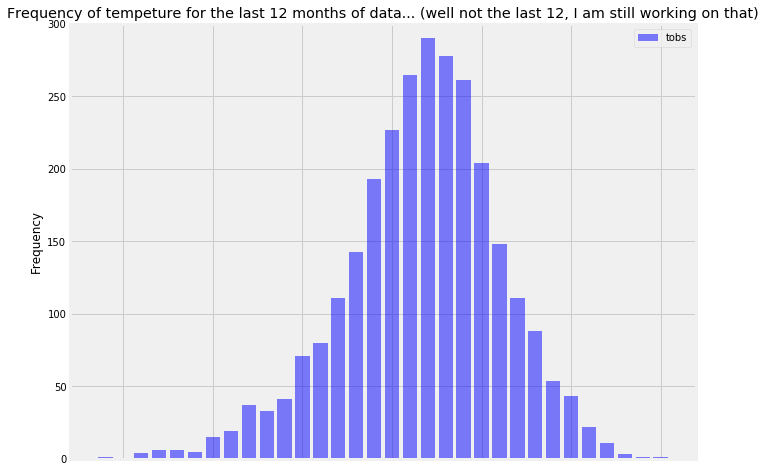

In [56]:
# station_USC00519281_temp_group_count
y_axis = station_USC00519281_temp_group_count_df.temp_count
x_axis = station_USC00519281_temp_group_count_df.index
# y_axis = prcp_df_s.Percipitation



plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

plt.tick_params(axis="x", labelbottom=False)

plt.ylim(0, 300)

plt.legend(["tobs"])

plt.title("Frequency of tempeture for the last 12 months of data... (well not the last 12, I am still working on that)")
plt.xlabel("")
plt.ylabel("Frequency")

plt.rcParams["figure.figsize"] = (10,8)

plt.show()

In [ ]:


x_axis = station_USC00519281.tobs
# y_axis = prcp_df_s.Percipitation

x_axis

fig, axs = plt.subplots(1, sharey=True, tight_layout=True)

# plt.ylim(0, 7)

plt.title("Frequency of tempeture for the last 12 months of data")
plt.xlabel("")
plt.ylabel("Frequency")

hist = x_axis.hist(bins=12)


![precipitation](Images/station-histogram.png)

In [ ]:
# ## Step 2 - Climate App
# Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.
# * Use FLASK to create your routes.


In [ ]:
### Routes
# * `/api/v1.0/precipitation`
#   * Convert the query results to a Dictionary using `date` as the key and `prcp` as the value.
#   * Return the JSON representation of your dictionary.
# * `/api/v1.0/stations`
#   * Return a JSON list of stations from the dataset.
# * `/api/v1.0/tobs`
#   * query for the dates and temperature observations from a year from the last data point.
#   * Return a JSON list of Temperature Observations (tobs) for the previous year.
# * `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`
#   * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
#   * When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.
#   * When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.

## Hints
# * You will need to join the station and measurement tables for some of the analysis queries.
# * Use Flask `jsonify` to convert your API data into a valid JSON response object.

